In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import math
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [3]:
d=pd.read_csv('HR_comma_sep.csv')
d

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
d.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
d.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [13]:
left=d[d['left']==1]
left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [17]:
retained = d[d['left']==0]
retained

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [19]:
d.groupby('left').mean()

C:\Users\SEJAL\AppData\Local\Temp\ipykernel_5708\4064882414.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot: xlabel='salary'>

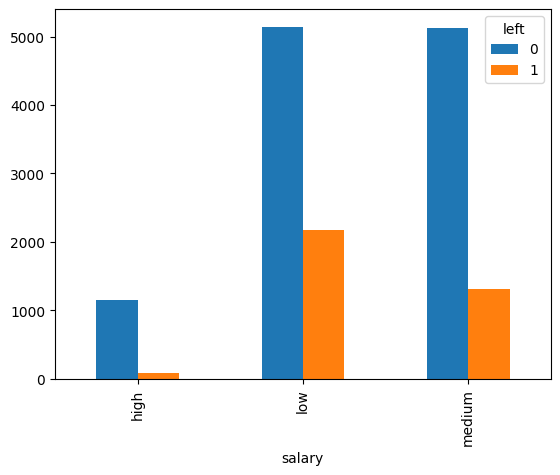

In [20]:
pd.crosstab(d['salary'],d['left']).plot(kind='bar')

<AxesSubplot: xlabel='Department'>

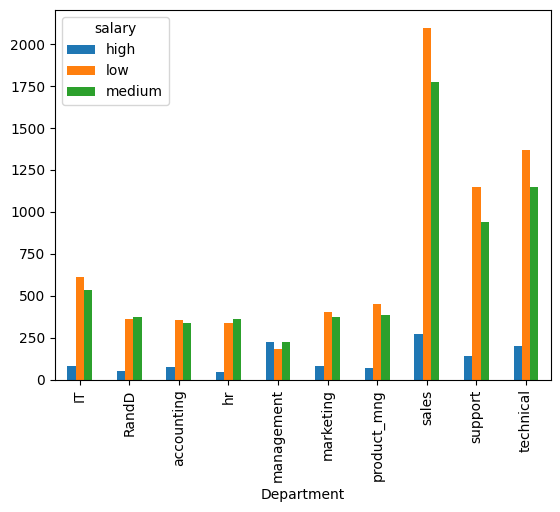

In [23]:
pd.crosstab(d.Department,d.salary).plot(kind='bar')

In [45]:
sofard=d[['satisfaction_level','average_montly_hours','salary','promotion_last_5years']]
sofard

,satisfaction_level,average_montly_hours,salary,promotion_last_5years
0,0.38,157,low,0
1,0.80,262,medium,0
2,0.11,272,medium,0
3,0.72,223,low,0
4,0.37,159,low,0
...,...,...,...,...
14994,0.40,151,low,0
14995,0.37,160,low,0
14996,0.37,143,low,0
14997,0.11,280,low,0


In [44]:
salarydummies=pd.get_dummies(sofard.salary,prefix='salary')
salarydummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [82]:
subd=pd.concat([sofard,salarydummies],axis='columns')
subd

,satisfaction_level,average_montly_hours,salary,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,low,0,0,1,0
1,0.80,262,medium,0,0,0,1
2,0.11,272,medium,0,0,0,1
3,0.72,223,low,0,0,1,0
4,0.37,159,low,0,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,low,0,0,1,0
14995,0.37,160,low,0,0,1,0
14996,0.37,143,low,0,0,1,0
14997,0.11,280,low,0,0,1,0


In [83]:
fuck=subd.drop('salary',axis='columns')
fuck

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [89]:
x=fuck
x

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [108]:
y=d.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [157]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2)

In [158]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg


LogisticRegression()

In [159]:
reg.fit(x_train,y_train)

C:\Users\SEJAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [160]:
x_train

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
4791,0.66,183,0,0,1,0
7565,0.95,184,0,0,0,1
1179,0.45,146,0,0,1,0
6478,0.59,240,0,0,0,1
10424,0.75,144,0,0,1,0
...,...,...,...,...,...,...
7725,0.16,192,0,1,0,0
13945,0.53,259,0,0,1,0
8481,0.97,144,0,0,1,0
2147,0.65,223,0,0,1,0


In [161]:
y_train

4791     0
7565     0
1179     1
6478     0
10424    0
        ..
7725     0
13945    0
8481     0
2147     0
1056     1
Name: left, Length: 2999, dtype: int64

In [162]:
x_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
8486,0.78,142,0,0,1,0
1959,0.37,160,0,0,1,0
3596,0.48,173,0,0,1,0
10199,0.61,160,0,0,0,1
7199,0.66,270,0,0,1,0
...,...,...,...,...,...,...
9523,0.83,223,0,0,1,0
11958,0.16,266,0,0,1,0
11212,0.97,212,0,1,0,0
5060,0.94,257,1,0,0,1


In [177]:
reg.predict([[0.5,250,1,0,1,0]])

C:\Users\SEJAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [164]:
reg.score(x_test,y_test)

0.7840833333333334